<a href="https://colab.research.google.com/github/Da-Seungheon/mini_project/blob/main/01_%ED%95%9C%EA%B5%AD%EB%B3%B5%EC%A7%80%ED%8C%A8%EB%84%90_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석 프로젝트

## 한국인의 삶을 파악하라

> - 한국 복지패널 데이터 : 분석 준비하기
> - 성별에 따른 월급 차이 : 성별에 따라 월급이 다를까?
> - 나이와 월급의 관계 : 몇 살 때 월급을 가장 많이 받을까?
> - 연령대에 따른 월급 차이 : 어떤 연령대의 월급이 가장 많을까?
> - 직업별 월급 차이 : 어떤 직업이 월급을 가장 많이 받을까?
> - 성별 직업 빈도 : 성별로 어떤 직업이 가장 많을까?
> - 종교 유무에 따른 이혼율 : 종교가 있으면 이혼을 덜 할까?
> - 지역별 연령대 비율 : 어느 지역에 노년층이 많을까?

### 1. 한국복지패널 데이터 준비하기

- 이용하는 파일은 spss 전용 파일입니다
- 아래 패키지를 설치하면 pandas 패키지의 함수를 이용해 spss, sas, stata 등 다양한 통게 분석 파일을 불러 올 수 있습니다

In [1]:
pip install pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 24.4 MB/s eta 0:00:00


In [2]:
!pip install koreanize_matplotlib

%config lineBackendin.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 47.3 MB/s eta 0:00:00


In [3]:
# 파일 불러오기
df = pd.read_spss('/content/drive/MyDrive/코드잇csv/Koweps_hpwc14_2019_beta2.sav')

# 복사본 만들기
copy_df = df.copy()
copy_df.head(1)

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [4]:
# 변수명 바꾸기
copy_df = copy_df.rename(columns={
    'h14_g3' : 'sex',
    'h14_g4' : 'birth',
    'h14_g10' : 'marriage_type',
    'h14_g11' : 'religion',
    'p1402_8aq1' : 'income',
    'h14_eco9' : 'code_job',
    'h14_reg7' : 'code_region'
})

- 데이터 분석에 필요한 준비를 마쳤습니다
- 해당 변수 7개를 이용해 분석하겠습니다
- 분석마다 두 단계로 진행합니다
    - 변수 검토 및 전처리
    - 변수 간 관계 분

### 2. 성별에 따른 월급 차이

- 1단계 : 변수 검토 및 전처리
    - 성별
    - 월급
- 2단계 : 변수 간 관계 분석
    - 성별 월급 평균표 만들기
    - 그래프 만들기

In [5]:
# copy_df['sex].dtypes
copy_df['sex'].value_counts()  #빈도 구하기

,count
sex,
2.0,7913
1.0,6505


- 1이면 남자
- 2이면 여자
- 모른다고 답하거나 응답하지 않으면 9로 입력이 되어 있다
- 이 정보를 바탕으로 데이터에 이상치가 있는지 검토하고, 분석할 때 제거하기 편하도록 Nan 을 부여해 결측 처리해야함
- 9인 경우도 성별을 알 수 없으니 결측치로 처리

In [6]:
copy_df['sex'] = np.where(copy_df['sex'] == 9, np.nan, copy_df['sex'])
copy_df['sex'].isna().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [8]:
# 1을 남자로, 2를 여자로 값의 이름을 변경하자
copy_df['sex'] = np.where(copy_df['sex'] == 1, 'male', 'female')
copy_df['sex'].value_counts()

,count
sex,
female,7913
male,6505


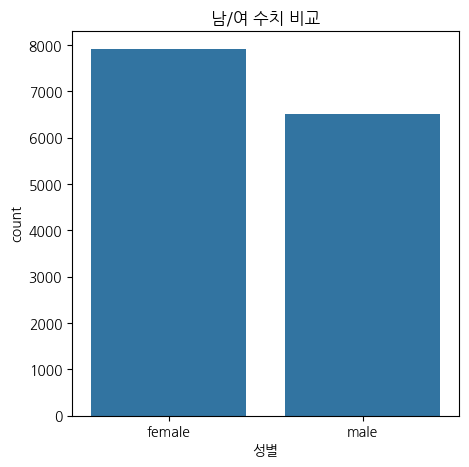

In [9]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data=copy_df, x='sex')
plt.title('남/여 수치 비교')
plt.xlabel('성별')
plt.show()

In [10]:
copy_df['income'].describe()  #통계치 확인

,income
count,4534.000000
mean,268.455007
std,198.021206
min,0.000000
25%,150.000000
50%,220.000000
75%,345.750000
max,1892.000000


In [11]:
# 결측치 확인
# 직업이 없어서 월급을 받지 않는 응답자가 있음
# 만약 최대값이 9999이면 이상치가 있는 것이므로 제거하고 분석을 진행 해야함
copy_df['income'].isna().sum()

9884

In [12]:
copy_df['income'] = np.where(copy_df['income'] == 9999, np.nan, copy_df['income'])
copy_df['income'].isna().sum()

9884

- 두 변수의 전처리 작업을 완료했으니 변수 간 관계를 분석할 차례입니다.
- 성별 월급 평균표를 만들어 월급 평균이 성별에 따라 차이가 있는지 비교해 보자

In [13]:
sex_income = copy_df.dropna(subset=['income'])\
.groupby('sex', as_index=False)['income']\
.agg('mean')
sex_income

,sex,income
0,female,186.293096
1,male,349.037571


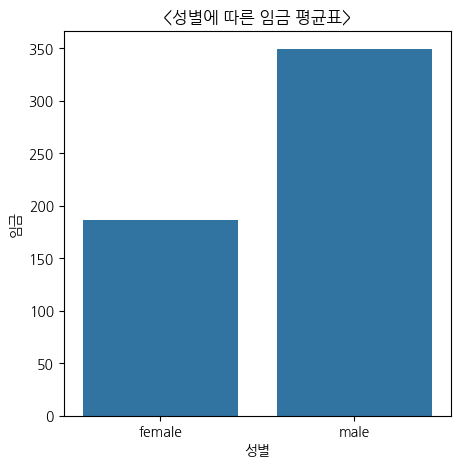

In [14]:
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(data=sex_income, x='sex', y='income')
plt.xlabel('성별')
plt.ylabel('임금')
plt.title('<성별에 따른 임금 평균표>')
plt.show()

- 남성의 월급이 여성의 두 배 가까울 정도로 많음

### 나이와 월급의 관계

- 나이 변수 검토

In [15]:
copy_df['birth'].describe()

,birth
count,14418.000000
mean,1969.280205
std,24.402250
min,1907.000000
25%,1948.000000
50%,1968.000000
75%,1990.000000
max,2018.000000


<Axes: xlabel='birth', ylabel='Count'>

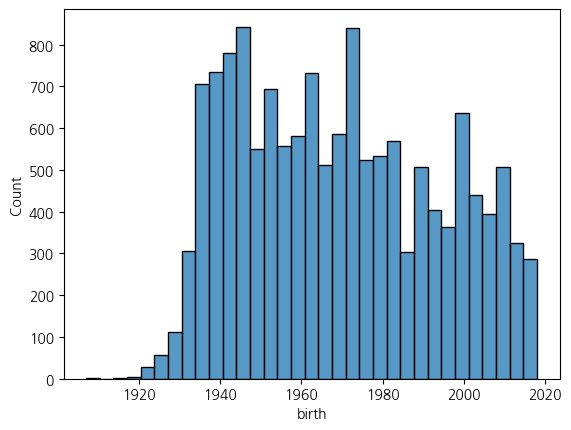

In [16]:
# 나이 분포도 확인
sns.histplot(data=copy_df, x='birth')

In [17]:
# 결측치 확인
copy_df['birth'].isna().sum()

0

In [18]:
# 이상치와 결측치가 없으니 파생변수를 만들어보자
# 조사를 시작한 년수에서 태어난 년도를 뺀 후 1을 더하면 나이를 나타낼 수 있음
# assighn 함수를 사용해서 새로운 컬럼을 만들어보자
copy_df = copy_df.assign(age = 2019 - copy_df['birth'] + 1)
copy_df['age'].describe()

,age
count,14418.000000
mean,50.719795
std,24.402250
min,2.000000
25%,30.000000
50%,52.000000
75%,72.000000
max,113.000000


<Axes: xlabel='age', ylabel='Count'>

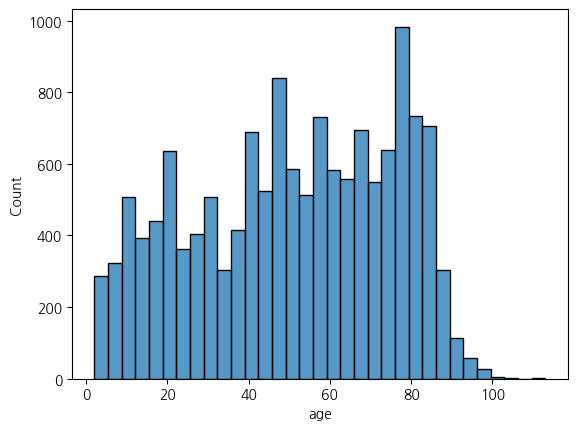

In [19]:
sns.histplot(data=copy_df, x='age')

In [20]:
# 나이와 월급의 관계를 분석해보자
age_income = copy_df.dropna(subset=['income'])\
.groupby('age', as_index=False)['income']\
.agg('mean')
age_income.head()

,age,income
0,19.0,162.000000
1,20.0,121.333333
2,21.0,136.400000
3,22.0,123.666667
4,23.0,179.676471


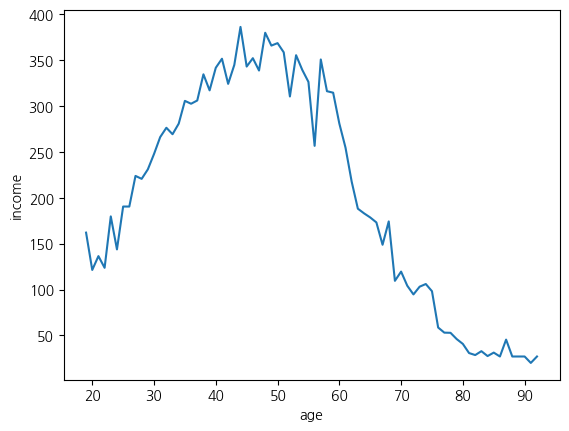

In [21]:
sns.lineplot(data=age_income, x='age' , y='income')
plt.show()

- 20대 초반에 월급을 150만 원 가량 받고 이후 지속해서 증가하는 추세를 보임
- 40대에 350만원 가량으로 가장 많이 받고, 지속해서 감소하다가
- 60대 후반 부터는 20대보다 낮은 월급을 받습니다

### 연령대에 따른 월급 차이 : 어떤 연령대의 월급이 가장 많을까?

- 먼저 연령대 변수와 월급 변수를 검토 및 전처리
- 이후 연령대 별 월급 평균표 만들기 및 그래프 만들기

- 파생 변수를 만들어보자
    - 초년층 : 30세 미만
    - 중년층 : 30~59
    - 노년층 : 60세 이상

In [22]:
copy_df = copy_df.assign(age_group=np.where(copy_df['age'] < 30, '초년층',
                                            np.where(copy_df['age'] <= 59, '중년층', '노년층')))

copy_df['age_group'].value_counts()

,count
age_group,
노년층,5955
중년층,4963
초년층,3500


<Axes: xlabel='age_group', ylabel='count'>

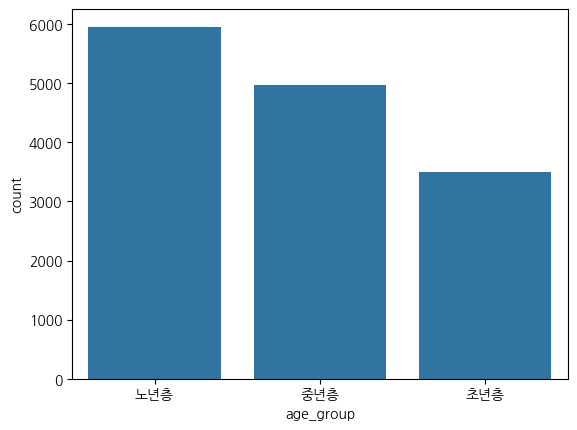

In [23]:
sns.countplot(data=copy_df, x='age_group')

- 연령대에 따른 월급 차이 분석

In [24]:
group_income = copy_df.dropna(subset=['income'])\
.groupby('age_group', as_index=False)['income']\
.agg('mean')

group_income

,age_group,income
0,노년층,140.129003
1,중년층,329.157157
2,초년층,195.663424


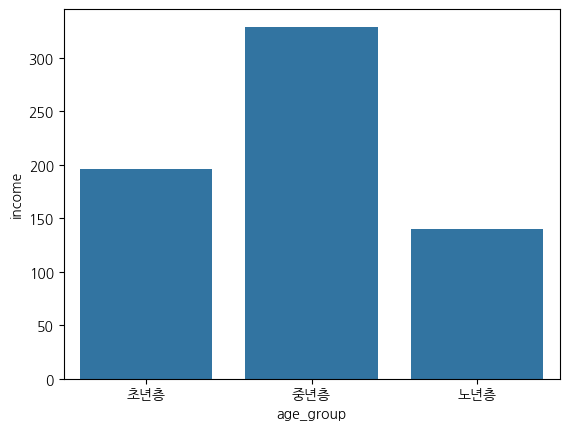

In [25]:
sns.barplot(data=group_income, x='age_group', y='income', order=['초년층', '중년층', '노년층'])
plt.show()

- 중년층이 330만원 정도로 가장 많은 월급을 받습니다. 노년층의 월급은 140만원, 초년층이 받는 195만 원보다 적습니다

### 연령대 및 성별 월급 차이 : 성별 월급 차이는 연령대별로 다를까?

- 변수 검토 및 전처리
    - 연령대
    - 성별
    - 월급
- 관계 분석
    - 연령대 및 성별 월급 평균표 만들기
    - 그래프 만들기

In [28]:
# 연령대 및 성별 월급평균표 만들기

sex_income = copy_df.dropna(subset=['income'])\
.groupby(['age_group', 'sex'], as_index=False)['income']\
.agg('mean')

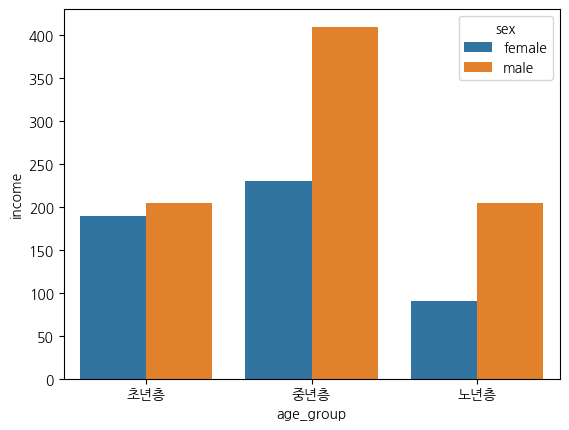

In [31]:
sns.barplot(data=sex_income, x='age_group', y='income' ,hue='sex', order=['초년층','중년층','노년층'])
plt.show()

- 성별 월급 차이의 양상이 연령대별로 다름
- 초년에는 월급 차이가 크지 않다가 중ㅇ년에 크게 벌어져 남성이 179만 원 가량 많습니다
- 노년에는 차이가 줄어들지만 여전히 남성이 114만 원가량 더 많습니다
- 연령대와 성별로 나눈 이번 분석 결과를 보면 노년층이 초년층보다 월급을 적게 받는 현상은 여성에게만 나타납니다
- 남성은 노년층과 월급이 비슷합니다
- 중년층이 초년층보다 월급을 더 많이 받는 현상도 주로 남성에게 나타나고, 여성은 차이가 크지 않습니다

---

In [33]:
# 나이 및 성별 월급 차이 분석하기

age_sex_income = copy_df.dropna(subset=['income'])\
.groupby(['age', 'sex'], as_index=False)['income']\
.agg('mean')

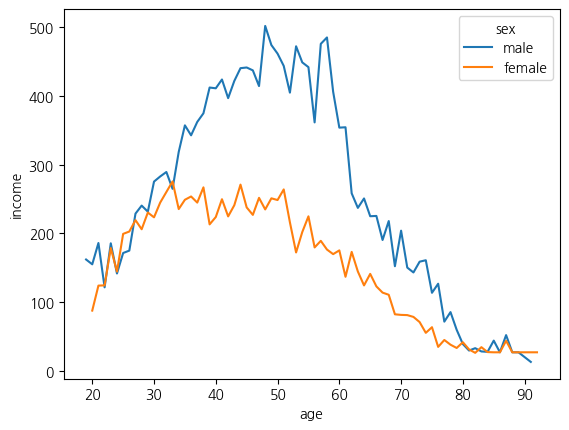

In [34]:
sns.lineplot(data=age_sex_income, x='age', y='income', hue='sex')
plt.show()

- 남성의 월급은 50세 전후까지 증가하다가 즙격하게 감소하는 반면
- 여성은 30세 초반까지 약간 증가하다가 이후로는 완만하게 감소합니다
- 성별 월급 격차는 30대 중반부터 벌어지다가 50대에 가장 크게 벌어지고, 이후로 점점 줄어들어 80대가 되면 비슷해 집니다

### 직업 별 월급 차이 - 어ㄸ너 직업이 월급을 가장 많이 받을까?

In [35]:
copy_df['code_job']

,code_job
0,NaN
1,NaN
2,762.0
3,855.0
4,NaN
...,...
14413,NaN
14414,NaN
14415,910.0
14416,246.0


In [38]:
list_job = pd.read_excel('/content/drive/MyDrive/코드잇csv/Koweps_Codebook_2019 (1).xlsx', sheet_name='직종코드')
list_job.head(1)

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원


In [39]:
# list_job 과 copy_df를 결합해보자

copy_df = copy_df.merge(list_job, how='left', on='code_job')
copy_df

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5,age,age_group,job
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,75.0,노년층,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,72.0,노년층,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,NaN,NaN,1284.0,NaN,0.0,NaN,78.0,노년층,전기공
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN,58.0,중년층,금속기계 부품 조립원
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,5.0,2.0,NaN,NaN,NaN,0.0,NaN,57.0,중년층,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,53.0,중년층,NaN
14414,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,28.0,초년층,NaN
14415,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,208.0,NaN,0.0,NaN,25.0,초년층,건설 및 광업 단순 종사자
14416,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,NaN,1200.0,NaN,0.0,NaN,22.0,초년층,보건 의료 관련 종사자


In [41]:
copy_df.dropna(subset=['code_job'])[['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


In [45]:
# 직업별 월급차이 분석

job_income = copy_df.dropna(subset=['income', 'job'])\
.groupby('job', as_index=False)['income']\
.agg('mean')

In [52]:
# 월급이 많은 직업 top 10개 분석

job_income = job_income.sort_values('income', ascending=False).head(10)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


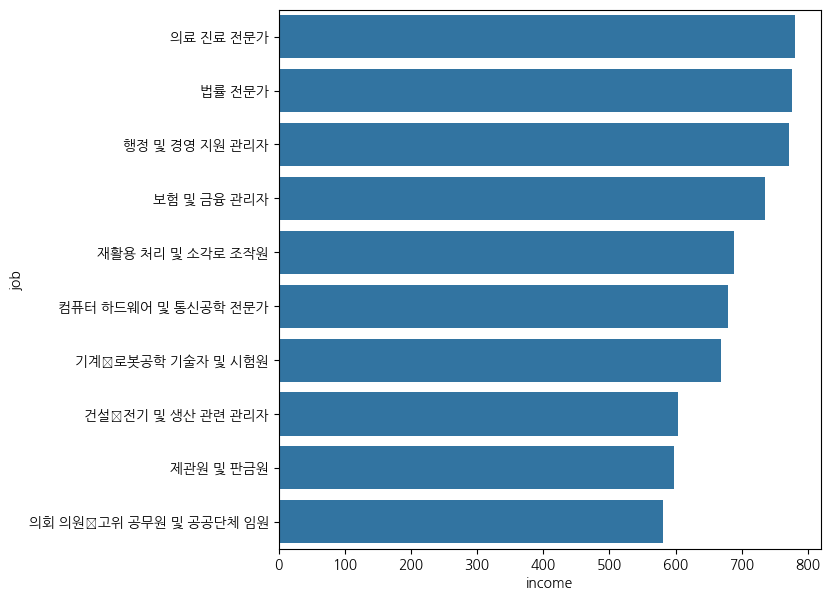

In [58]:
fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(data=job_income, x='income' ,y='job')
plt.show()

- 의료 진료 전문가의 월깁이 평균 781만원으로 가장 높고, 그 뒤로는 법률 전문가, 행정 및 경영 지원 관린자 등 순으로 월급이 많습니다

### 성별 직업 빈도 - 성별로 어떤 직업이 가장 많을까?

In [80]:
# 남자 직업
job_male = copy_df.dropna(subset=['job'])\
.query('sex =="male"')\
.groupby('job', as_index=False)\
.agg(count=('job', 'count'))\
.sort_values('count', ascending=False)\
.head(10)

In [77]:
# 여자 직업
job_female = copy_df.dropna(subset=['job'])\
.query('sex =="female"')\
.groupby('job', as_index=False)\
.agg(count=('job', 'count'))\
.sort_values('count', ascending=False)\
.head(10)

[(0.0, 500.0)]

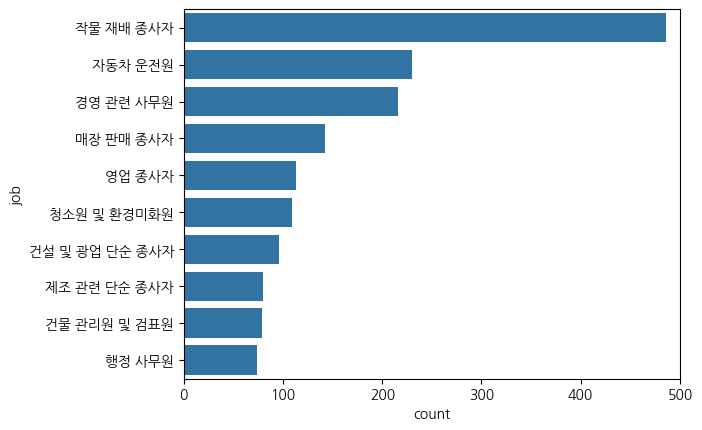

In [82]:
sns.barplot(data=job_male, y='job', x='count').set(xlim=[0, 500])

[(0.0, 500.0)]

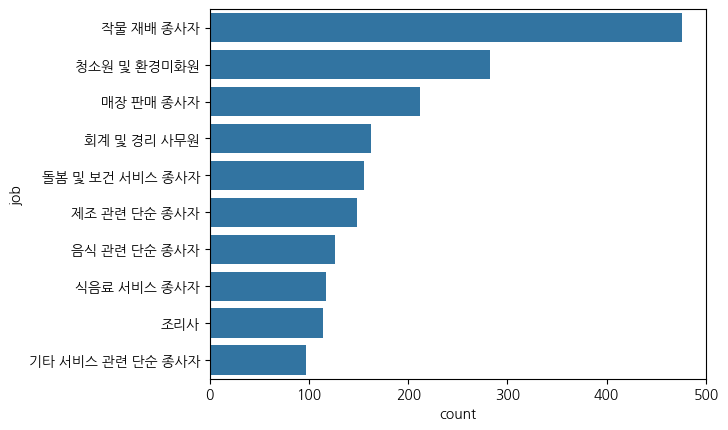

In [83]:
sns.barplot(data=job_female, y='job', x='count').set(xlim=[0, 500])

### 종교에 따른 이혼율 : 종교가 있으면 이혼을 덜 할까?

- 변수 검토 및 전처리
    - 종교
    - 혼인 상태
- 관계 분석
    - 종교 유무에 따른 이혼율 표 만들기
    - 그래프 만들기

In [84]:
# 종교가 있으면 yes 없으면 no로 전처리

copy_df['religion'] = np.where(copy_df['religion'] == 1, 'yes', 'no')
copy_df['religion'].value_counts()

,count
religion,
no,7815
yes,6603


<Axes: xlabel='religion', ylabel='count'>

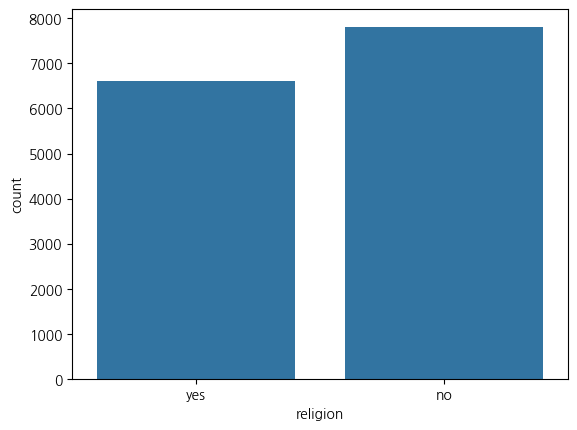

In [85]:
sns.countplot(data=copy_df, x='religion')

In [94]:
# 혼인 상태 변수 검토 및 전처리
# 배우자가 있으면 1, 이혼 했으면 3
copy_df['marriage'] = np.where(copy_df['marriage_type'] == 1, 'marriage',
         np.where(copy_df['marriage_type'] == 3, 'divorce' ,'etc'))

copy_df.groupby('marriage', as_index=False).agg(count=('marriage', 'count'))

,marriage,count
0,divorce,689
1,etc,6539
2,marriage,7190


In [96]:
count_df = copy_df.groupby('marriage', as_index=False)['marriage_type'].agg('count')

<Axes: xlabel='marriage', ylabel='marriage_type'>

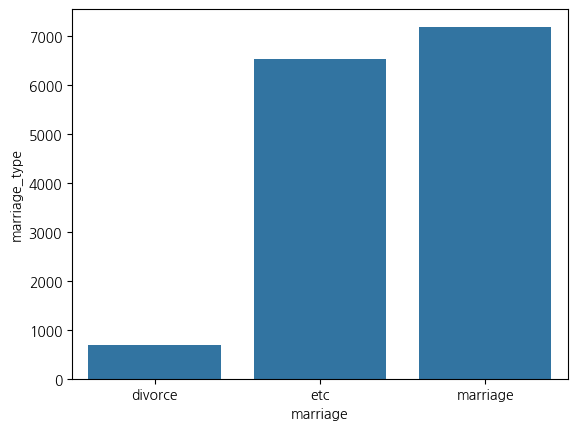

In [97]:
sns.barplot(data=count_df, x='marriage', y='marriage_type')

- 결혼 상태인 사람은 7190명
- 이혼한 사람은 689명
- 어디에도 속하지 않아 etc에 분류된 사람은 6539명

In [103]:
# 종교유무에 따른 이혼율 분석하기
religion = copy_df.query('marriage != "etc"')\
.groupby('religion', as_index=False)['marriage']\
.value_counts(normalize=True)

religion

,religion,marriage,proportion
0,no,marriage,0.905045
1,no,divorce,0.094955
2,yes,marriage,0.920469
3,yes,divorce,0.079531


In [105]:
# 이혼에만 해당하는 값을 추출한 다음 백분율로 바꾸고 그래프 만들어보자

religion = religion.query('marriage == "divorce"')\
.assign(proportion = religion['proportion'] * 100)\
.round(2)

religion

,religion,marriage,proportion
1,no,divorce,9.50
3,yes,divorce,7.95


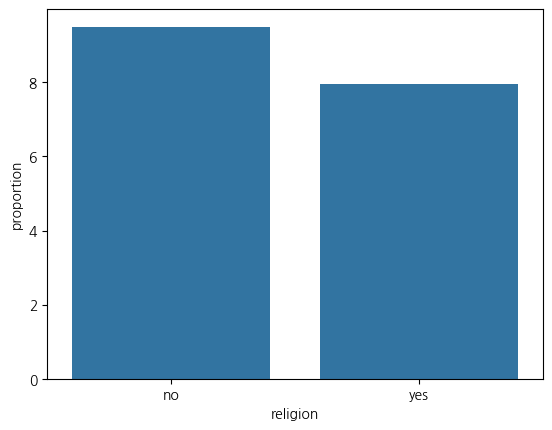

In [106]:
sns.barplot(data=religion, x='religion', y='proportion')
plt.show()

- 종교가 있으면 이혼율은 8%
- 종교가 없으면 이혼율은 9.5%
- 따라서 종교가 있는 사람이 이혼을 덜 한다

### 연령대 및 종교 유무에 따른 이혼율 분석

- 연령대별 이혼율 표 만들기

In [108]:
# 연령대 및 이혼 여부별 비율
copy_df.query('marriage != "etc"')\
.groupby('age_group', as_index=False)['marriage']\
.value_counts(normalize=True)

,age_group,marriage,proportion
0,노년층,marriage,0.914220
1,노년층,divorce,0.085780
2,중년층,marriage,0.910302
3,중년층,divorce,0.089698
4,초년층,marriage,0.950000
5,초년층,divorce,0.050000


In [123]:
# 연령대 및 이혼 여부별 빈도
age_marriage = copy_df.query('marriage != "etc"')\
.groupby('age_group', as_index=False)['marriage']\
.value_counts(normalize=True)

age_marriage

,age_group,marriage,proportion
0,노년층,marriage,0.914220
1,노년층,divorce,0.085780
2,중년층,marriage,0.910302
3,중년층,divorce,0.089698
4,초년층,marriage,0.950000
5,초년층,divorce,0.050000


In [124]:
# 초년층은 제외하고 이혼비율을 알아보자
age_marriage = age_marriage.query('age_group != "초년층" & marriage == "divorce"')\
                .assign(proportion = age_marriage['proportion'] * 100)\
                .round(2)

age_marriage

,age_group,marriage,proportion
1,노년층,divorce,8.58
3,중년층,divorce,8.97


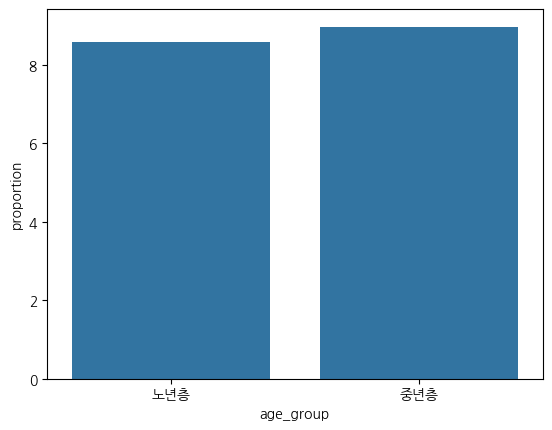

In [126]:
sns.barplot(data=age_marriage, x='age_group', y='proportion');

In [135]:
# 연령대 및 종교유무 이혼율표 만들기
div_df = copy_df.query('age_group != "초년층" & marriage != "etc"')\
.groupby(['age_group', 'religion'], as_index=False)['marriage']\
.value_counts(normalize=True)

div_df

,age_group,religion,marriage,proportion
0,노년층,no,marriage,0.904382
1,노년층,no,divorce,0.095618
2,노년층,yes,marriage,0.922222
3,노년층,yes,divorce,0.077778
4,중년층,no,marriage,0.904953
5,중년층,no,divorce,0.095047
6,중년층,yes,marriage,0.917520
7,중년층,yes,divorce,0.082480


In [137]:
# 이혼인 값들만 뽑아보자
div_df = div_df.query('marriage == "divorce"')\
.assign(proportion = div_df['proportion'] * 100)\
.round(2)

div_df

,age_group,religion,marriage,proportion
1,노년층,no,divorce,9.56
3,노년층,yes,divorce,7.78
5,중년층,no,divorce,9.50
7,중년층,yes,divorce,8.25


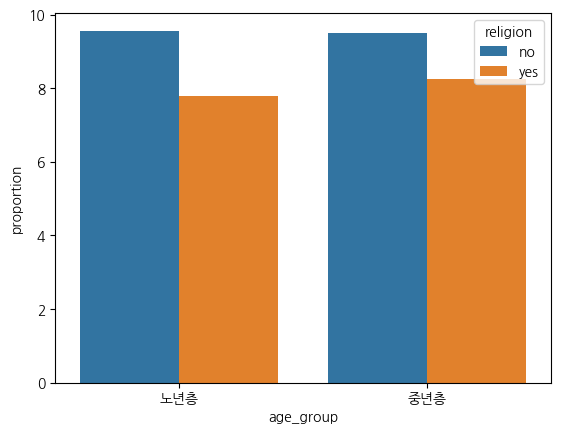

In [138]:
sns.barplot(data=div_df, x='age_group', y='proportion', hue='religion')
plt.show()

- 중년 노년 모두 종교가 없는 사람의 이혼율이 더 높습니다
- 중년은 1.3%, 노년은 1.8% 정도로 종교가 없는 사람의 이혼율이 더 높습니다

---

### 지역별 연령대 비율 : 어느 지역에 노년층이 더 많을까?

- 변수 검토 및 전처리
    - 지역
    - 연령대
- 변수 간 관계 분석
    - 지역별 연령대 비율 만들기
    - 그래프 만들기

In [139]:
region = pd.DataFrame({
    'code_region' : [1, 2, 3, 4, 5, 6, 7],
    'region' : ['서울',
                '수도권(인천/경기)',
                '부산/경남/울산',
                '대구/경북',
                '대전/충남',
                '강원/충북',
                '광주/전남/전북/제주도'
                ]})

region

,code_region,region
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [145]:
copy_df = copy_df.merge(region, how='left', on='code_region')

MergeError: Passing 'suffixes' which cause duplicate columns {'region_x'} is not allowed.

In [146]:
copy_df[['code_region', 'region']]

,code_region,region
0,1.0,서울
1,1.0,서울
2,1.0,서울
3,1.0,서울
4,1.0,서울
...,...,...
14413,5.0,대전/충남
14414,5.0,대전/충남
14415,5.0,대전/충남
14416,5.0,대전/충남


<Axes: xlabel='proportion', ylabel='region'>

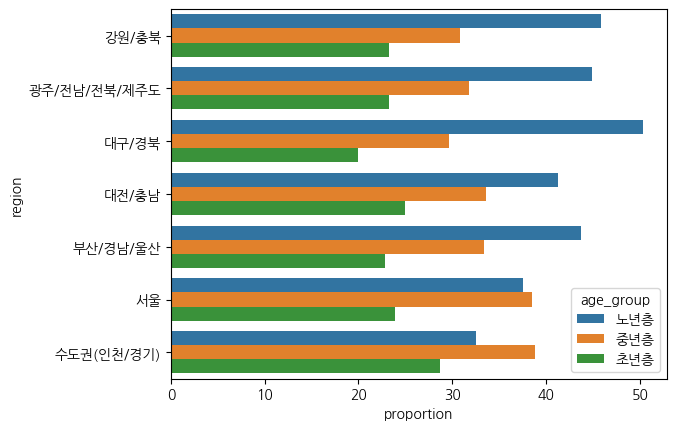

In [159]:
# 지역별 연령대 비율 분석하기

region_df = copy_df.groupby('region', as_index=False)['age_group'].value_counts(normalize=True)

# 백분율 나타내기
region_df = region_df.assign(proportion = region_df['proportion'] * 100)\
.round(2)

sns.barplot(data=region_df, y='region',  x='proportion', hue='age_group')

### 누적 막대 그리프 만들기

- 행과 열을 회전해 표의 구성을 바꾸는 작업을 피벗(pivot)
- 지역, 연령대, 비율 변수만 추출한 다음 함수를 사용하자
    - 지역을 기준으로 회전하도록 index = 'region'
    - 연령대별로 열을 구성하도록 columns = 'age_group'
    - 항목 값을 비율로 채우도록 values = 'proportion'

In [161]:
pivot_df = region_df[['region', 'age_group', 'proportion']].pivot(index = 'region',
                                                                  columns = 'age_group',
                                                                  values = 'proportion')

pivot_df

age_group,노년층,중년층,초년층
region,,,
강원/충북,45.91,30.87,23.22
광주/전남/전북/제주도,44.93,31.79,23.28
대구/경북,50.41,29.63,19.97
대전/충남,41.34,33.64,25.02
부산/경남/울산,43.75,33.37,22.88
서울,37.61,38.51,23.88
수도권(인천/경기),32.50,38.82,28.68


<Axes: ylabel='region'>

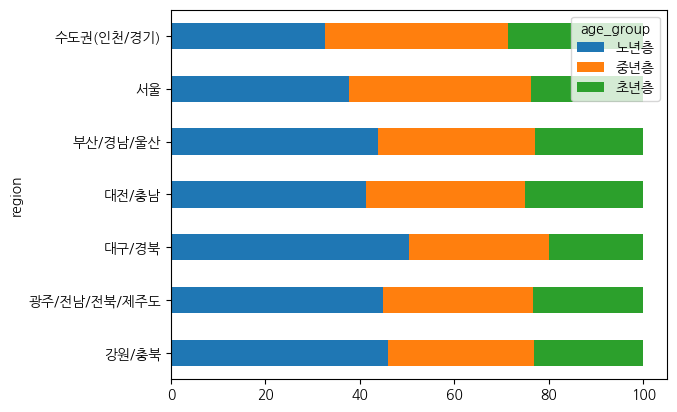

In [162]:
pivot_df.plot.barh(stacked=Trueㅠㅠ)

- 막대 순서를 바꿔보자
- 노년층 비율이 높은 순으로 정렬되도록 old값을 기준으로 정렬
- 연령대 순으로 막대 색깔 나열

In [164]:
nwe_df = pivot_df.sort_values('노년층')[['초년층', '중년층','노년층']]
nwe_df

age_group,초년층,중년층,노년층
region,,,
수도권(인천/경기),28.68,38.82,32.50
서울,23.88,38.51,37.61
대전/충남,25.02,33.64,41.34
부산/경남/울산,22.88,33.37,43.75
광주/전남/전북/제주도,23.28,31.79,44.93
강원/충북,23.22,30.87,45.91
대구/경북,19.97,29.63,50.41


<Axes: ylabel='region'>

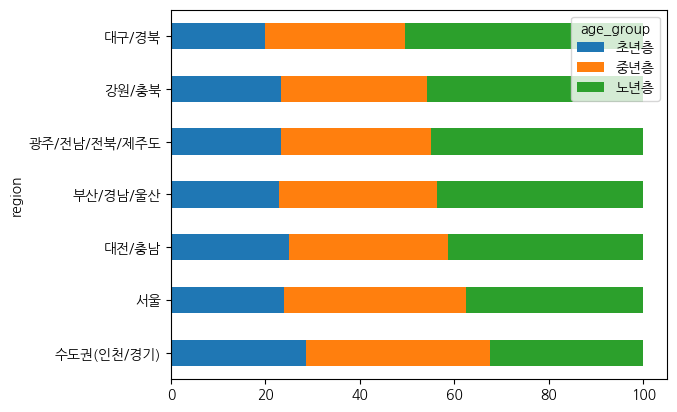

In [165]:
nwe_df.plot.barh(stacked=True)